# Importing Modules

In [ ]:
pip install covid;

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.1 MB 12.6 MB/s 
  Created wheel for covid: filename=covid-2.5.0-py3-none-any.whl size=10464 sha256=d5b2587cb8deb2a7a707995b5d2db5943e5e325846d1a7927aa34cb7db48f277
  Stored in directory: /root/.cache/pip/wheels/ef/58/2d/822094ab97e5ec5de389fb66cc9445aaeaeb33cc2414457a22
Successfully built covid


In [ ]:
pip install pycountry;

     |████████████████████████████████| 10.1 MB 8.1 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=68e1809dd1ea22160b8d87cf94641e77e57a83cd757ebf45b2c876ed4a5508b2
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 7.0 MB/s 
     |████████████████████████████████| 15.4 MB 40 kB/s 
     |████████████████████████████████| 6.3 MB 41.9 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import pandas as pd
import datetime as dt
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import pycountry
import warnings
import seaborn as sns
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Tests and deaths per million

In [ ]:
from covid import Covid

# by default data source is "john_hopkins"
covid = Covid()

# or
covid = Covid(source="john_hopkins")

# to get data from worldometers.info
covid = Covid(source="worldometers")

# get all data
data=pd.DataFrame(covid.get_data())

In [ ]:
data.columns

Index(['country', 'total_cases', 'confirmed', 'new_cases', 'deaths',
       'new_deaths', 'recovered', 'active', 'active_cases', 'critical',
       'total_tests', 'total_tests_per_million', 'total_cases_per_million',
       'total_deaths_per_million', 'population'],
      dtype='object')

In [ ]:
pycountry.countries.get(name=data["country"][100])

Country(alpha_2='KG', alpha_3='KGZ', name='Kyrgyzstan', numeric='417', official_name='Kyrgyz Republic')

In [ ]:
import pycountry
def code_generator(column):
  codes=[]
  for i in column:
    try:
      code=pycountry.countries.get(name=i).alpha_3
      codes.append(code)
    except:
      codes.append(None)
  return codes

In [ ]:
data["CODE"]=code_generator(data["country"])

In [ ]:
for i in range(len(data)):
  if (data.iloc[i]["CODE"])==None:
    print(data.iloc[i]["country"],i)

North America 0
Asia 1
South America 2
Europe 3
Africa 4
Oceania 5
0 6
World 7
USA 8
UK 11
Russia 12
Iran 15
Vietnam 48
UAE 53
Bolivia 65
Palestine 72
Venezuela 76
S. Korea 83
Moldova 86
Ivory Coast 126
DRC 127
Syria 141
Laos 146
Tanzania 147
Taiwan 162
Channel Islands 176
CAR 177
Brunei 182
Sint Maarten 195
St. Vincent Grenadines 198
Saint Martin 199
Turks and Caicos 204
British Virgin Islands 205
Caribbean Netherlands 208
St. Barth 209
Faeroe Islands 210
Diamond Princess 212
Falkland Islands 217
Saint Pierre Miquelon 219
Vatican City 220
MS Zaandam 223
Saint Helena 228
Micronesia 229


In [ ]:
data["CODE"].iloc[8]="USA"
data["CODE"].iloc[11]="UK"
data["CODE"].iloc[12]="RUS"
data["CODE"].iloc[15]="IRN"
data["CODE"].iloc[50]="VNM"
data["CODE"].iloc[53]="UAE"
data["CODE"].iloc[83]="KOR"
data["CODE"].iloc[162]="TWN"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

country                     0
total_cases                 0
confirmed                   0
new_cases                   0
deaths                      0
new_deaths                  0
recovered                   0
active                      0
active_cases                0
critical                    0
total_tests                 0
total_tests_per_million     0
total_cases_per_million     0
total_deaths_per_million    0
population                  0
CODE                        0
dtype: int64

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# merge with world.shp data with confirmed cases data and fatalities data
merge=pd.merge(world,data,on='CODE')
# merge with data which contains latitude and longitude
#merge=merge.merge(pd.read_csv(path+'countries_latitude_longitude.csv'),on='name').sort_values(by='Fatalities',ascending=False).reset_index()

In [ ]:
merge

,pop_est,continent,name,CODE,gdp_md_est,geometry,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,51483,51483,0,653,0,47615,3215,3215,6,421449,0,56906,722,904698
1,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,10,10,0,1,0,8,1,1,0,0,0,16,2,615948
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1657262,1657262,0,28195,0,1587026,42041,42041,776,44186056,0,43426,739,38162478
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,45179209,45179209,0,733058,0,34630654,9815497,9815497,17157,657102757,0,135482,2198,333468970
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,903924,903924,1863,11530,41,846012,46382,46382,221,11575012,0,47421,605,19061857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,194575,194575,0,6817,0,180791,6967,6967,0,1319879,0,93399,3272,2083265
148,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,1000365,1000365,0,8683,0,863479,128203,128203,285,5839285,0,115082,999,8692606
149,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,135010,135010,0,1983,0,127502,5525,5525,0,760564,0,214927,3157,628167
150,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,52480,52480,0,1540,0,46640,4300,4300,22,360283,0,37346,1096,1405248


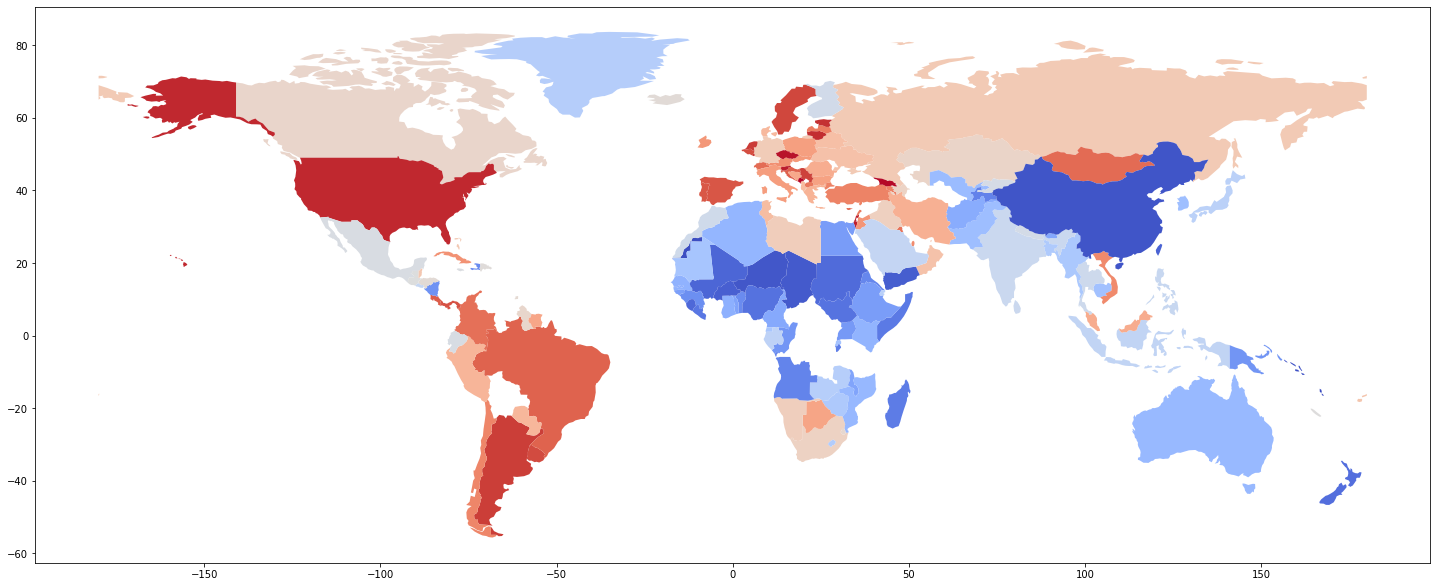

In [ ]:
merge.plot(column='total_cases_per_million',
           figsize=(25, 20),
           cmap='coolwarm')
#plt.title('Cases per million of Coronavirus in different countries ',fontsize=25)
# add countries names and numbers 
#for i in range(0,10):
    #plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.Confirmed_Cases[i]),size=10)


plt.show()

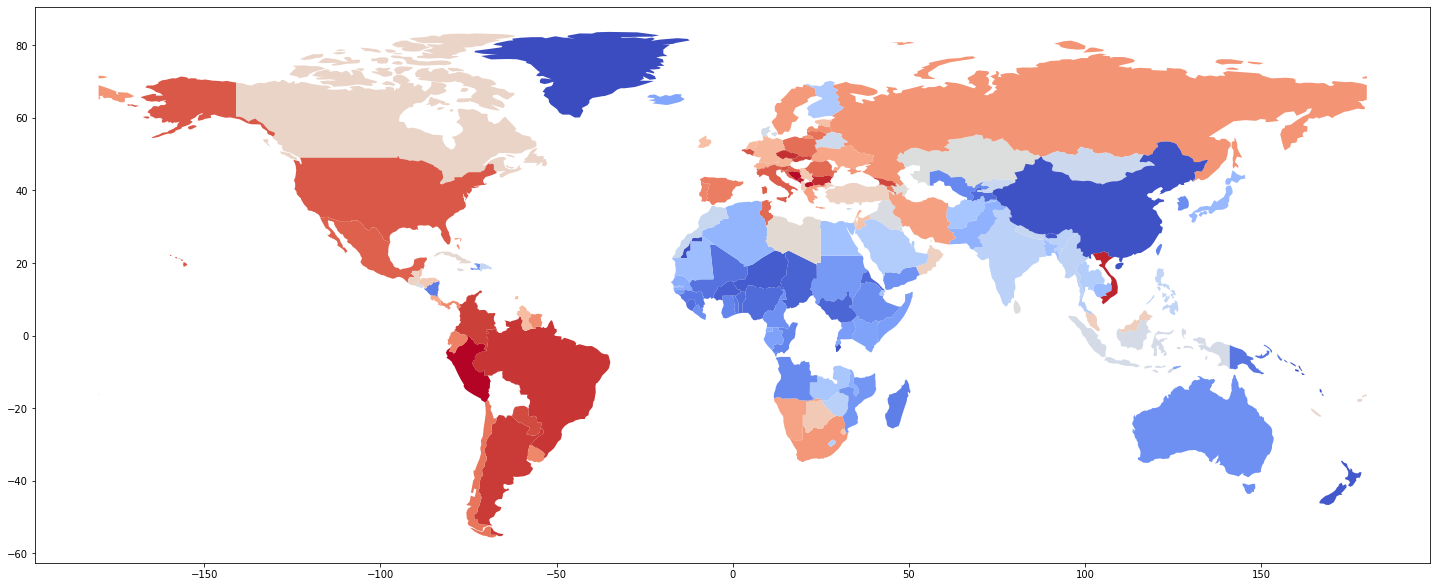

In [ ]:
merge.plot(column='total_deaths_per_million',
           figsize=(25, 20),
           cmap='coolwarm')
#plt.title('Cases per million of Coronavirus in different countries ',fontsize=25)
# add countries names and numbers 
#for i in range(0,10):
    #plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.Confirmed_Cases[i]),size=10)


plt.show()

# Tests vs Cases
# Deaths vs Cases

In [ ]:
data["total_tests_per_million"]=(10**6)*data["total_tests"]/data["population"]

In [ ]:
data

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population,CODE
8,USA,45179209,45179209,0,733058,0,34630654,9815497,9815497,17157,657102757,1970506.452219527352125146757,135482,2198,333468970,USA
9,India,33953475,33953475,1200,450621,0,33271915,230939,230939,8944,582595693,416963.1975519954070555906308,24300,323,1397235287,IND
10,Brazil,21567181,21567181,0,600880,0,20670348,295953,295953,8318,63776166,297353.8545812793660120495976,100556,2802,214479029,BRA
11,UK,8120713,8120713,0,137697,0,6619618,1363398,1363398,808,311519071,4558426.583666531722087448360,118830,2015,68339166,UK
12,Russia,7775365,7775365,28647,216415,962,6858119,700831,700831,2300,196800000,1347815.769007553048621269049,53251,1482,146014021,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Palau,8,8,0,0,0,5,3,3,0,10852,596132.7180839375961327180839,439,0,18204,PLW
225,Vanuatu,4,4,0,1,0,3,0,0,0,23000,72729.34249512239083483798748,13,3,316241,VUT
226,Marshall Islands,4,4,0,0,0,4,0,0,0,0,0,67,0,59697,MHL
227,Samoa,3,3,0,0,0,3,0,0,0,0,0,15,0,200089,WSM


In [ ]:
np.mean(data["population"])

38429029.68717948

In [ ]:
data=data[data["population"]>10*8]

In [ ]:
data["total_tests_per_million"]=data["total_tests_per_million"].astype("float")
data["total_cases_per_million"]=data["total_cases_per_million"].astype("float")
data["total_deaths_per_million"]=data["total_deaths_per_million"].astype("float")

In [ ]:
np.mean(data["total_tests_per_million"]),np.mean(data["total_cases_per_million"]),np.mean(data["total_deaths_per_million"])

(1063117.1127323858, 52200.05641025641, 850.6461538461539)

In [ ]:
np.max(data["total_tests_per_million"]),np.max(data["total_cases_per_million"]),np.max(data["total_deaths_per_million"])

(14480996.031884488, 218299.0, 5950.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


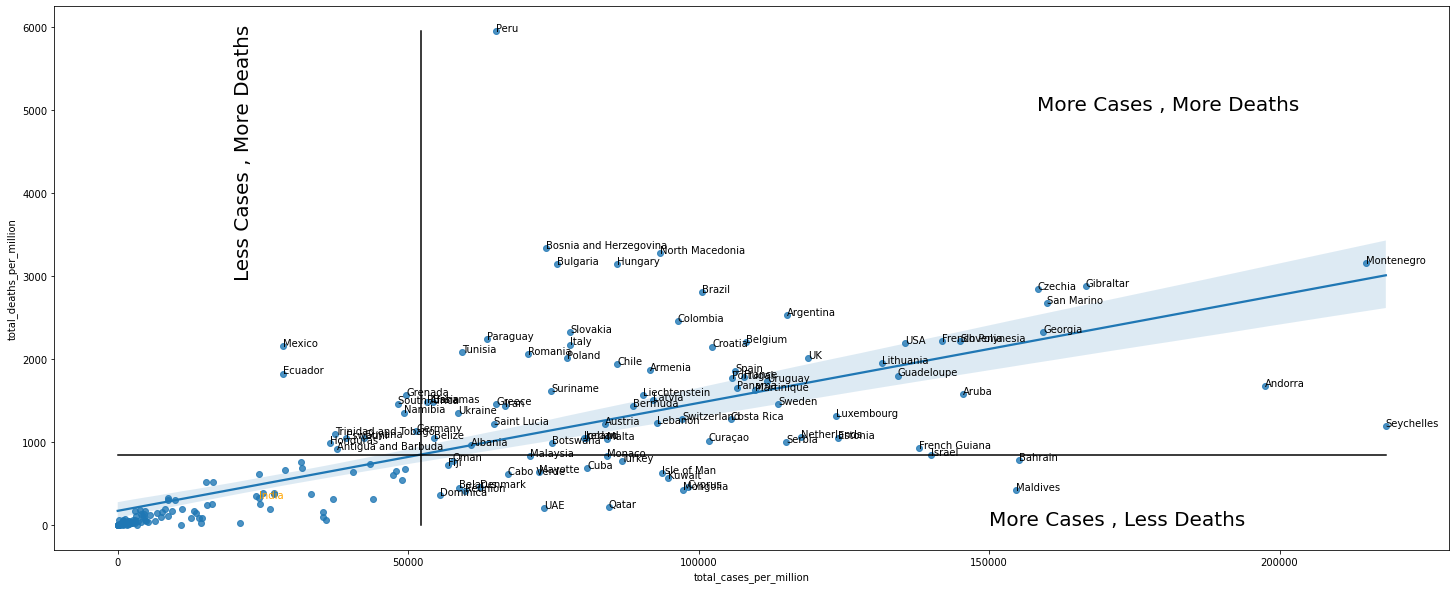

In [ ]:
plt.figure(figsize=(25,10))
sns.regplot(data["total_cases_per_million"],data["total_deaths_per_million"])
plt.plot([0,218299.0],[850.6461538461539,850.6461538461539],color="black")
plt.plot([52200.05641025641,52200.05641025641],[0,5950.0],color="black")
for i in range(len(data)):
  if ( data["total_deaths_per_million"].iloc[i]>=850.6461538461539) or ( data["total_cases_per_million"].iloc[i]>=52113.40512820513):  
    plt.annotate(data["country"].iloc[i],(data["total_cases_per_million"].iloc[i],data["total_deaths_per_million"].iloc[i]))
  if data["country"].iloc[i]=="India":
    plt.annotate(data["country"].iloc[i],(data["total_cases_per_million"].iloc[i],data["total_deaths_per_million"].iloc[i]),color="orange")
plt.text(158299.0,5000,"More Cases , More Deaths", fontsize=20)
plt.text(150000,0,"More Cases , Less Deaths", fontsize=20)
plt.text(20000,3000,"Less Cases , More Deaths", fontsize=20,rotation=90)

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


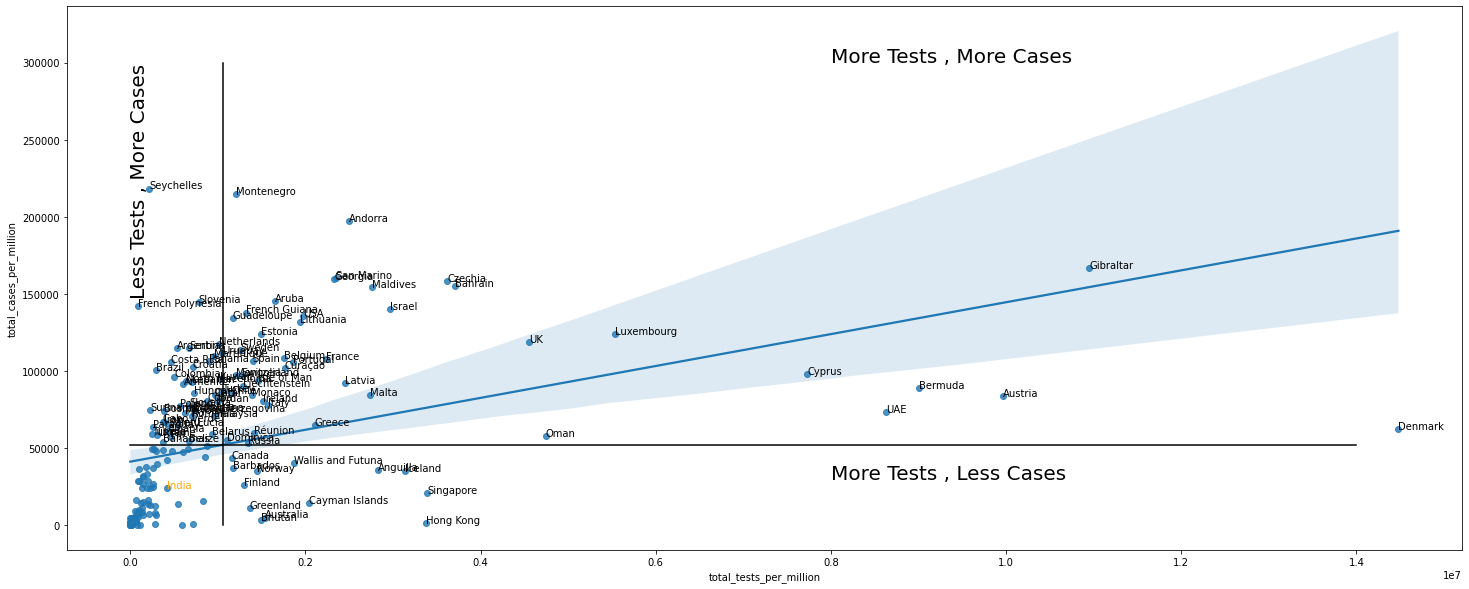

In [ ]:
plt.figure(figsize=(25,10))
sns.regplot(data["total_tests_per_million"],data["total_cases_per_million"])
plt.plot([0,14000000],[52113.40512820513,52113.40512820513],color="black")
plt.plot([1061721.139265996,1061721.139265996],[0,300000],color="black")
for i in range(len(data)):
  if ( data["total_tests_per_million"].iloc[i]>=1061721.139265996) or ( data["total_cases_per_million"].iloc[i]>=52113.40512820513):  
    plt.annotate(data["country"].iloc[i],(data["total_tests_per_million"].iloc[i],data["total_cases_per_million"].iloc[i]))
  if data["country"].iloc[i]=="India":
    plt.annotate(data["country"].iloc[i],(data["total_tests_per_million"].iloc[i],data["total_cases_per_million"].iloc[i]),color="orange")
plt.text(8000000,300000,"More Tests , More Cases", fontsize=20)
plt.text(8000000,30000,"More Tests , Less Cases", fontsize=20)
plt.text(0,150000,"Less Tests , More Cases", fontsize=20,rotation=90)

plt.show()


# Index data

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/index.csv
index_data=pd.read_csv("index.csv")

--2021-10-10 09:51:56--  https://storage.googleapis.com/covid19-open-data/v3/index.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2383257 (2.3M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   2.27M  --.-KB/s    in 0.02s   

2021-10-10 09:51:56 (145 MB/s) - ‘index.csv’ saved [2383257/2383257]



In [ ]:
index_data

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0
3,AF_BAL,ChIJWZOescNSyzgRkmVJ8fmfR3k,Q121104,NaN,AF,Afghanistan,BAL,Balkh,NaN,NaN,NaN,NaN,AF,AFG,1
4,AF_BAM,ChIJw-bKQwDr0jgRQiw8jHsQ-HI,Q171382,NaN,AF,Afghanistan,BAM,Bamyan,NaN,NaN,NaN,NaN,AF,AFG,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22573,ZA_WC_DC3,ChIJK_tKPIMB0h0Ra5Do064SuR8,Q1899307,NaN,ZA,South Africa,WC,Western Cape,DC3,Overberg,NaN,NaN,ZA,ZAF,2
22574,ZA_WC_DC4,ChIJ-YctajEi1B0R80qCAelNcY0,Q220249,NaN,ZA,South Africa,WC,Western Cape,DC4,Garden Route,NaN,NaN,ZA,ZAF,2
22575,ZA_WC_DC5,ChIJg-OB74w21R0RumMhJW3W6wE,Q1053888,NaN,ZA,South Africa,WC,Western Cape,DC5,Central Karoo,NaN,NaN,ZA,ZAF,2
22576,ZM,ChIJcQv8_KX0QBkRRT5Yfqz5n_E,Q953,country/ZMB,ZM,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,ZM,ZMB,0


# Epidimology dataset

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv

--2021-10-10 09:52:25--  https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353953977 (338M) [text/csv]
Saving to: ‘epidemiology.csv’

epidemiology.csv    100%[===================>] 337.56M   186MB/s    in 1.8s    

2021-10-10 09:52:27 (186 MB/s) - ‘epidemiology.csv’ saved [353953977/353953977]



In [ ]:
epidemiology_data=pd.read_csv("epidemiology.csv")

In [ ]:
epidemiology_data

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8475974,2021-10-02,ZW,35.0,2.0,NaN,2016.0,131129.0,4627.0,NaN,1279611.0
8475975,2021-10-03,ZW,76.0,0.0,NaN,2138.0,131205.0,4627.0,NaN,1281749.0
8475976,2021-10-04,ZW,0.0,0.0,NaN,2636.0,131205.0,4627.0,NaN,1284385.0
8475977,2021-10-05,ZW,229.0,3.0,NaN,4051.0,131434.0,4630.0,NaN,1288436.0


In [ ]:
epidemiology_data=epidemiology_data.groupby("location_key").sum()
epidemiology_data.fillna(0,inplace=True)
index=epidemiology_data.index

In [ ]:
index

Index(['AD', 'AE', 'AF', 'AF_BAL', 'AF_BAM', 'AF_BDG', 'AF_BDS', 'AF_BGL',
       'AF_DAY', 'AF_FRA',
       ...
       'ZA_NW_DC40', 'ZA_WC', 'ZA_WC_CPT', 'ZA_WC_DC1', 'ZA_WC_DC2',
       'ZA_WC_DC3', 'ZA_WC_DC4', 'ZA_WC_DC5', 'ZM', 'ZW'],
      dtype='object', name='location_key', length=20360)

In [ ]:
locations=[]
for i in index:
    idx=index_data[index_data["location_key"]==i].index[0]
    locations.append(index_data[index_data["location_key"]==i].country_name[idx])

In [ ]:
index_data[index_data["location_key"]=="AD"].index[0]

0

In [ ]:
epidemiology_data["country"]=locations
epidemiology_data=epidemiology_data.groupby("country").sum()
epidemiology_data.dropna(axis=1,inplace=True)

In [ ]:
epidemiology_data

,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
country,,,,,,,,
Afghanistan,279041.0,13392.0,101324.0,0.0,50233850.0,2153459.0,11470665.0,0.0
Albania,173723.0,2746.0,0.0,737014.0,38374853.0,703436.0,0.0,101667859.0
Algeria,204276.0,5843.0,0.0,0.0,49914685.0,1428785.0,0.0,0.0
American Samoa,3.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0
Andorra,15288.0,130.0,0.0,0.0,4288456.0,48937.0,0.0,7549408.0
...,...,...,...,...,...,...,...,...
Vietnam,826837.0,20223.0,0.0,8226643.0,36994601.0,834681.0,0.0,860400188.0
Wallis and Futuna,454.0,7.0,0.0,0.0,93127.0,1302.0,0.0,0.0
Yemen,9299.0,1765.0,0.0,0.0,1947368.0,427538.0,0.0,0.0


# Demography data

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/demographics.csv

--2021-10-10 10:22:57--  https://storage.googleapis.com/covid19-open-data/v3/demographics.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1531911 (1.5M) [text/csv]
Saving to: ‘demographics.csv’

demographics.csv    100%[===================>]   1.46M  --.-KB/s    in 0.01s   

2021-10-10 10:22:57 (129 MB/s) - ‘demographics.csv’ saved [1531911/1531911]



In [ ]:
demographics_data=pd.read_csv("demographics.csv")
demographics_data=demographics_data.groupby("location_key").mean()
demographics_data.dropna(inplace=True)
index=demographics_data.index
locations=[]
for i in index:
    idx=index_data[index_data["location_key"]==i].index[0]
    locations.append(index_data[index_data["location_key"]==i].country_name[idx])

In [ ]:
demographics_data["country"]=locations

In [ ]:
demographics_data1=demographics_data.groupby("country").sum()
demographics_data2=demographics_data.groupby("country").mean()
demographics_data3=demographics_data.groupby("country").max()

In [ ]:
demographics_data2

,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
country,,,,,,,,,,,,,,,,,,
Afghanistan,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59627.0,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
Algeria,43851043.0,22153807.0,21697235.0,11542954.0,31510100.0,2729325.0,2729325.0,18411.0,0.754,9677490.0,6731747.0,6573715.0,7275235.0,5448619.0,3800056.0,2530542.0,1237834.0,575805.0
Angola,32866267.0,16260870.0,16605398.0,10764270.0,21061025.0,8044735.0,8044735.0,26363.0,0.581,10899168.0,7881778.0,5306037.0,3699729.0,2412735.0,1464602.0,785897.0,331729.0,84592.0
Argentina,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,15057273.0,19280518.0,16515.0,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0
Armenia,2963234.0,1393747.0,1569487.0,1087883.0,1869848.0,1083323.0,1083323.0,104083.0,0.743,418859.0,368930.0,408924.0,503953.0,353088.0,362653.0,328402.0,126742.0,91682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,28435943.0,13984931.0,14451011.0,3353461.0,25162368.0,2935501.0,9431165.0,32238.0,0.761,5094599.0,5158568.0,4130338.0,4027921.0,3564974.0,3014983.0,2042555.0,989860.0,412144.0
Vietnam,97338583.0,48598254.0,48740329.0,61129966.0,35332140.0,8371428.0,16735581.0,313925.0,0.694,15478572.0,13599043.0,15389496.0,16200924.0,13572962.0,11109968.0,7342687.0,2778472.0,1866459.0
Yemen,29825967.0,15024985.0,14800983.0,18292399.0,10869523.0,2874373.0,2874373.0,56492.0,0.452,8033408.0,6750274.0,5732746.0,4140438.0,2362804.0,1422835.0,879450.0,403471.0,100542.0


In [ ]:
pop=demographics_data1["population"]

In [ ]:
demographics_data1=demographics_data1[["population_male","population_female",	"population_rural","population_urban","population_age_00_09","population_age_10_19","population_age_20_29","population_age_30_39","population_age_40_49","population_age_50_59","population_age_60_69","population_age_70_79","population_age_80_and_older"]]

In [ ]:
demographics_data1

,population_male,population_female,population_rural,population_urban,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
country,,,,,,,,,,,,,
Afghanistan,19976265.0,18952076.0,28244481.0,9797273.0,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
Algeria,22153807.0,21697235.0,11542954.0,31510100.0,9677490.0,6731747.0,6573715.0,7275235.0,5448619.0,3800056.0,2530542.0,1237834.0,575805.0
Angola,16260870.0,16605398.0,10764270.0,21061025.0,10899168.0,7881778.0,5306037.0,3699729.0,2412735.0,1464602.0,785897.0,331729.0,84592.0
Argentina,19523766.0,20593330.0,3599141.0,41339571.0,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0
Armenia,1393747.0,1569487.0,1087883.0,1869848.0,418859.0,368930.0,408924.0,503953.0,353088.0,362653.0,328402.0,126742.0,91682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,13984931.0,14451011.0,3353461.0,25162368.0,5094599.0,5158568.0,4130338.0,4027921.0,3564974.0,3014983.0,2042555.0,989860.0,412144.0
Vietnam,48598254.0,48740329.0,61129966.0,35332140.0,15478572.0,13599043.0,15389496.0,16200924.0,13572962.0,11109968.0,7342687.0,2778472.0,1866459.0
Yemen,15024985.0,14800983.0,18292399.0,10869523.0,8033408.0,6750274.0,5732746.0,4140438.0,2362804.0,1422835.0,879450.0,403471.0,100542.0


In [ ]:
demographics_data1 = demographics_data1.divide(pop, axis=0 )

In [ ]:
demographics_data1

,population_male,population_female,population_rural,population_urban,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
country,,,,,,,,,,,,,
Afghanistan,0.513155,0.486845,0.725551,0.251675,0.284850,0.252298,0.180739,0.116487,0.076126,0.047271,0.027165,0.012342,0.002721
Algeria,0.505206,0.494794,0.263231,0.718571,0.220690,0.153514,0.149910,0.165908,0.124253,0.086658,0.057708,0.028228,0.013131
Angola,0.494759,0.505241,0.327517,0.640810,0.331622,0.239814,0.161443,0.112569,0.073411,0.044562,0.023912,0.010093,0.002574
Argentina,0.434453,0.458254,0.080090,0.919910,0.149512,0.156780,0.143098,0.128556,0.100295,0.087051,0.064849,0.040445,0.022120
Armenia,0.470347,0.529653,0.367127,0.631016,0.141352,0.124502,0.137999,0.170069,0.119156,0.122384,0.110826,0.042772,0.030940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.491805,0.508195,0.117930,0.884879,0.179161,0.181410,0.145251,0.141649,0.125369,0.106027,0.071830,0.034810,0.014494
Vietnam,0.499270,0.500730,0.628014,0.362982,0.159018,0.139709,0.158103,0.166439,0.139441,0.114137,0.075434,0.028544,0.019175
Yemen,0.503755,0.496245,0.613304,0.364432,0.269343,0.226322,0.192207,0.138820,0.079220,0.047705,0.029486,0.013528,0.003371


In [ ]:
demographics_data2=demographics_data2[["population_clustered",'population_density', 'human_development_index']]
demographics_data3=demographics_data3[["population_largest_city"]]

In [ ]:
demographics_data1["cases_per_person"]=epidemiology_data["new_tested"]/pop
demographics_data1[["population_clustered","population_density","human_development_index"]]=demographics_data2[["population_clustered","population_density","human_development_index"]]
demographics_data1["population_largest_city"]=demographics_data3["population_largest_city"]/pop
demographics_data1["deaths_per_person"]=epidemiology_data["new_deceased"]/pop

In [ ]:
#demographics_data1=demographics_data1/demographics_data["population"]

In [ ]:
demographics_data1

,population_male,population_female,population_rural,population_urban,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,cases_per_person,population_clustered,population_density,human_development_index,population_largest_city,deaths_per_person
country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.513155,0.486845,0.725551,0.251675,0.284850,0.252298,0.180739,0.116487,0.076126,0.047271,0.027165,0.012342,0.002721,0.000000,4114030.0,59627.0,0.498,0.105682,0.000344
Algeria,0.505206,0.494794,0.263231,0.718571,0.220690,0.153514,0.149910,0.165908,0.124253,0.086658,0.057708,0.028228,0.013131,0.000000,2729325.0,18411.0,0.754,0.062241,0.000133
Angola,0.494759,0.505241,0.327517,0.640810,0.331622,0.239814,0.161443,0.112569,0.073411,0.044562,0.023912,0.010093,0.002574,0.000000,8044735.0,26363.0,0.581,0.244772,0.000049
Argentina,0.434453,0.458254,0.080090,0.919910,0.149512,0.156780,0.143098,0.128556,0.100295,0.087051,0.064849,0.040445,0.022120,1.170080,19280518.0,16515.0,0.825,0.335062,0.007550
Armenia,0.470347,0.529653,0.367127,0.631016,0.141352,0.124502,0.137999,0.170069,0.119156,0.122384,0.110826,0.042772,0.030940,0.356554,1083323.0,104083.0,0.743,0.365588,0.001856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.491805,0.508195,0.117930,0.884879,0.179161,0.181410,0.145251,0.141649,0.125369,0.106027,0.071830,0.034810,0.014494,0.000000,9431165.0,32238.0,0.761,0.103232,0.000160
Vietnam,0.499270,0.500730,0.628014,0.362982,0.159018,0.139709,0.158103,0.166439,0.139441,0.114137,0.075434,0.028544,0.019175,0.084516,16735581.0,313925.0,0.694,0.086003,0.000208
Yemen,0.503755,0.496245,0.613304,0.364432,0.269343,0.226322,0.192207,0.138820,0.079220,0.047705,0.029486,0.013528,0.003371,0.000000,2874373.0,56492.0,0.452,0.096371,0.000059


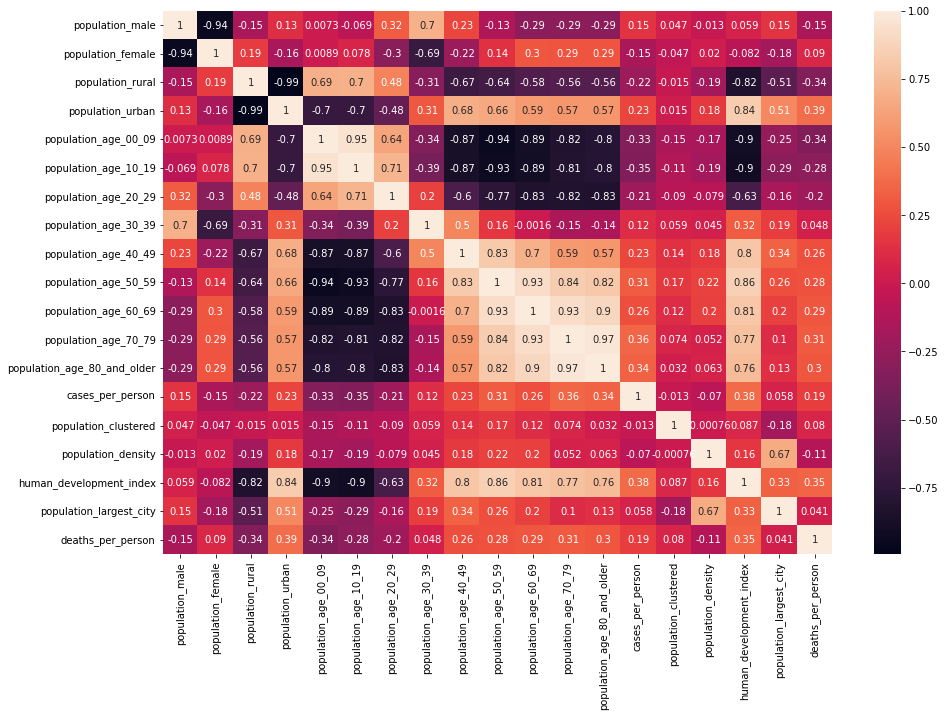

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(demographics_data1.corr(method ='pearson'), annot=True)

# Weather dataset

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/index.csv
index_data=pd.read_csv("index.csv")

--2021-10-10 10:06:24--  https://storage.googleapis.com/covid19-open-data/v3/index.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2383257 (2.3M) [text/csv]
Saving to: ‘index.csv.1’

index.csv.1         100%[===================>]   2.27M  --.-KB/s    in 0.02s   

2021-10-10 10:06:24 (129 MB/s) - ‘index.csv.1’ saved [2383257/2383257]



In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/weather.csv

--2021-10-10 10:06:29--  https://storage.googleapis.com/covid19-open-data/v3/weather.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085660042 (1.0G) [text/csv]
Saving to: ‘weather.csv’

weather.csv         100%[===================>]   1.01G   146MB/s    in 7.6s    

2021-10-10 10:06:37 (137 MB/s) - ‘weather.csv’ saved [1085660042/1085660042]



In [ ]:
weather_data=pd.read_csv("weather.csv")
weather_data=weather_data.groupby("location_key").mean()
weather_data.dropna(inplace=True)
index=weather_data.index
locations=[]
for i in index:
    idx=index_data[index_data["location_key"]==i].index[0]
    locations.append(index_data[index_data["location_key"]==i].country_name[idx])

In [ ]:
index

Index(['AD', 'AF', 'AF_BAL', 'AF_BAM', 'AF_BDG', 'AF_BDS', 'AF_BGL', 'AF_DAY',
       'AF_FRA', 'AF_FYB',
       ...
       'UY_RO', 'UY_RV', 'UY_SA', 'UY_SJ', 'UY_SO', 'UY_TA', 'UY_TT', 'UZ',
       'XK', 'ZM'],
      dtype='object', name='location_key', length=6443)

In [ ]:
index_data[index_data["location_key"]=="AF"].index[0]

2

In [ ]:
index_data[index_data["location_key"]=="ZW"].country_name[22577]

'Zimbabwe'

In [ ]:
len(locations)

6443

In [ ]:
weather_data["country"]=locations

In [ ]:
#weather_data["case_to_test_ratio"]=epidemiology_data["new_confirmed"]/epidemiology_data["new_tested"]

In [ ]:
weather_data=weather_data.groupby("country").mean()

In [ ]:
weather_data["cases_per_person"]=epidemiology_data["new_tested"]/pop
weather_data["deaths_per_person"]=epidemiology_data["new_deceased"]/pop

In [ ]:
#weather_data=weather_data[weather_data['case_to_test_ratio']!=np.inf]

In [ ]:
#weather_data.dropna(inplace=True)

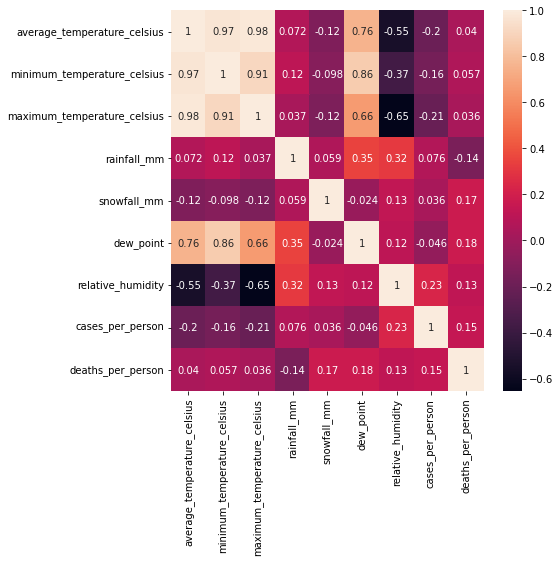

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(weather_data.corr(method ='pearson'), annot=True)

# Economy

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/economy.csv

--2021-10-10 11:18:34--  https://storage.googleapis.com/covid19-open-data/v3/economy.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c02::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9383 (9.2K) [text/csv]
Saving to: ‘economy.csv.1’

economy.csv.1       100%[===================>]   9.16K  --.-KB/s    in 0s      

2021-10-10 11:18:34 (75.4 MB/s) - ‘economy.csv.1’ saved [9383/9383]



In [ ]:
economy_data=pd.read_csv("economy.csv")
economy_data=economy_data.groupby("location_key").mean()
economy_data.dropna(inplace=True)
index=economy_data.index
locations=[]
cases=[]
for i in index:
    idx=index_data[index_data["location_key"]==i].index[0]
    locations.append(index_data[index_data["location_key"]==i].country_name[idx])

In [ ]:
economy_data["country"]=locations

In [ ]:
economy_data=economy_data.groupby("country").sum()

In [ ]:
economy_data["cases_per_person"]=epidemiology_data["new_tested"]/pop
economy_data["deaths_per_person"]=epidemiology_data["new_deceased"]/pop

In [ ]:
economy_data

,gdp_usd,gdp_per_capita_usd,human_capital_index,cases_per_person,deaths_per_person
country,,,,,
Afghanistan,1.910135e+10,502.0,0.389,0.000000,0.000344
Albania,1.527808e+10,5352.0,0.621,NaN,NaN
Algeria,1.699882e+11,3948.0,0.523,0.000000,0.000133
Angola,9.463542e+10,2973.0,0.361,0.000000,0.000049
Argentina,4.496634e+11,10006.0,0.611,1.170080,0.007550
...,...,...,...,...,...
Vanuatu,9.170588e+08,3058.0,0.471,NaN,NaN
Vietnam,2.619212e+11,2715.0,0.666,0.084516,0.000208
Yemen,2.759126e+10,968.0,0.369,0.000000,0.000059


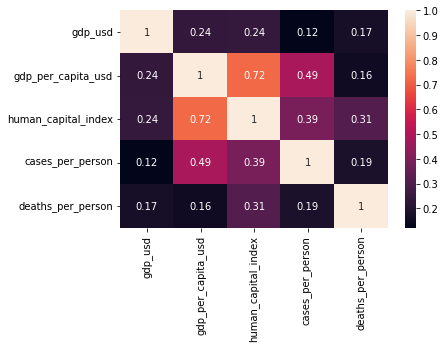

In [ ]:
ax = sns.heatmap(economy_data.corr(method ='pearson'), annot=True)

# Health

In [ ]:
!wget https://storage.googleapis.com/covid19-open-data/v3/health.csv

--2021-10-10 11:28:19--  https://storage.googleapis.com/covid19-open-data/v3/health.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120944 (118K) [text/csv]
Saving to: ‘health.csv.1’

health.csv.1        100%[===================>] 118.11K  --.-KB/s    in 0.001s  

2021-10-10 11:28:19 (101 MB/s) - ‘health.csv.1’ saved [120944/120944]



In [ ]:
health=pd.read_csv("health.csv")

In [ ]:
health

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,WS,73.187,27.7,9.2,13.6,138.239,80.735,85.0,20.6,NaN,2.4885,0.3445,233.065063,27.634661
3453,YE,66.096,18.4,5.4,42.9,219.749,174.558,194.2,30.6,NaN,0.7852,NaN,72.039467,58.321163
3454,ZA,63.857,20.3,12.7,28.5,376.404,248.816,86.7,26.2,NaN,1.3078,0.9054,499.237549,38.775391
3455,ZM,63.510,13.8,4.5,40.4,321.143,221.573,127.2,17.9,NaN,1.3376,1.1867,67.648666,8.015779


In [ ]:
health=pd.read_csv("health.csv")
health=health.groupby("location_key").mean()
health.dropna(inplace=True)
index=health.index
locations=[]
cases=[]
for i in index:
    idx=index_data[index_data["location_key"]==i].index[0]
    locations.append(index_data[index_data["location_key"]==i].country_name[idx])

In [ ]:
health["country"]=locations

In [ ]:
health=health.groupby("country").sum()

In [ ]:
health["cases_total_person"]=epidemiology_data["new_tested"]/pop
health["deaths_total_person"]=epidemiology_data["new_deceased"]/pop

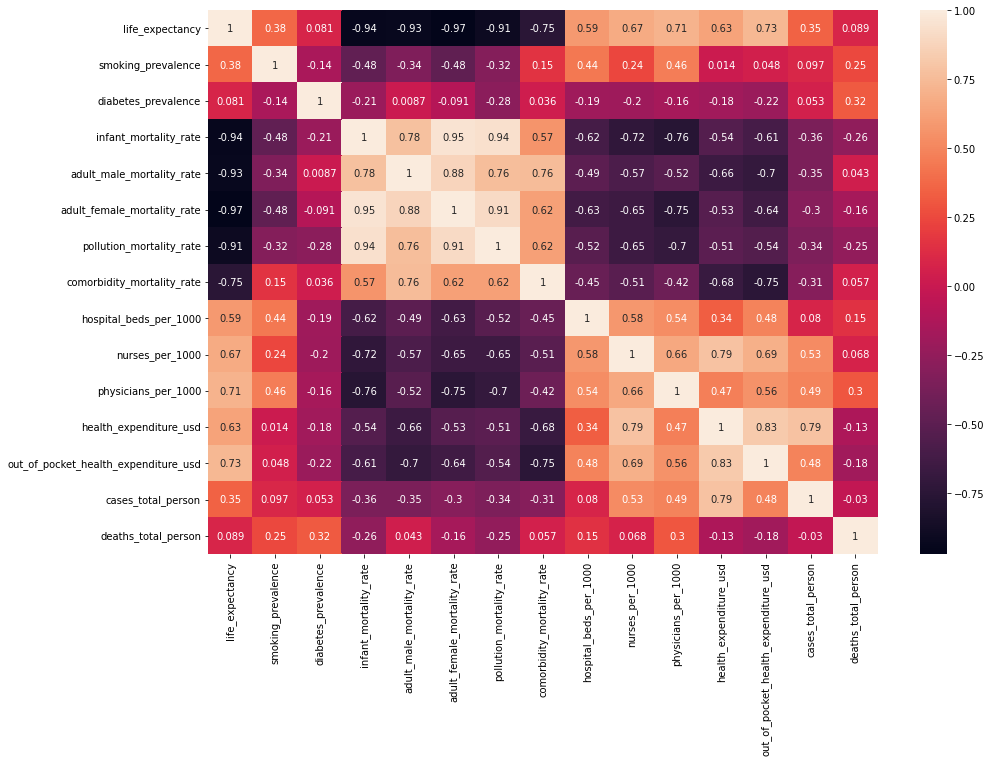

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(health.corr(method ='pearson'), annot=True)